In [93]:
import pandas as pd
import datetime
import calendar
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [75]:
features = pd.read_csv(r"C:\Users\A_R_COMPUTERS\Desktop\BA\Walmart-Sales-Forecasting-2ba4d5130d387bf9e05f53319ab17393040a3bcf\features.csv")
stores = pd.read_csv(r"C:\Users\A_R_COMPUTERS\Desktop\BA\Walmart-Sales-Forecasting-2ba4d5130d387bf9e05f53319ab17393040a3bcf\stores.csv")
train = pd.read_csv(r"C:\Users\A_R_COMPUTERS\Desktop\BA\Walmart-Sales-Forecasting-2ba4d5130d387bf9e05f53319ab17393040a3bcf\train.csv")


In [78]:
features.shape, stores.shape, train.shape

((8190, 12), (45, 3), (421570, 5))

In [79]:
data = train.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
print(data.shape)

(421570, 17)


In [81]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


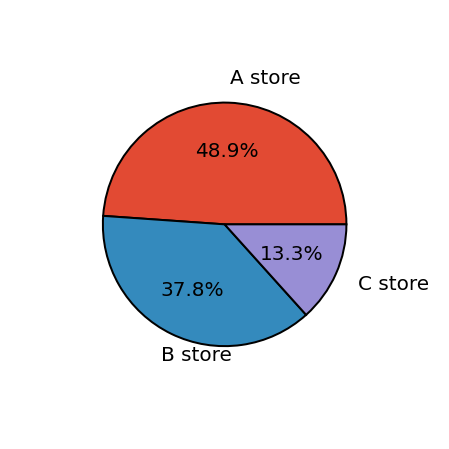

In [89]:
sorted_type = stores.groupby('Type')
plt.style.use('ggplot')
labels=['A store','B store','C store']
#sizes=sorted_type.describe()['Size'].round(1)
#sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100] # convert to the proportion

fig, axes = plt.subplots(1,1, figsize=(8,8))
wprops={'edgecolor':'black',
      'linewidth':2}
tprops = {'fontsize':20}
axes.pie(sizes,
        labels=labels,
        explode=(0.0,0,0),
        autopct='%1.1f%%',
        pctdistance=0.6,
        labeldistance=1.2,
        wedgeprops=wprops,
        textprops=tprops,
        radius=0.7,
        center=(0.5,0.5))
plt.show()

<AxesSubplot:xlabel='IsHoliday_x', ylabel='Weekly_Sales'>

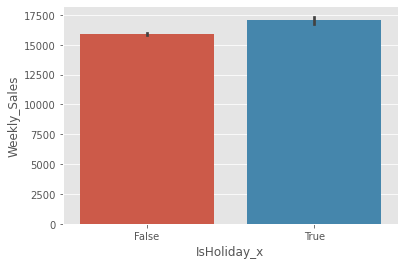

In [96]:
holiday = data['Weekly_Sales'].loc[data['IsHoliday_x']== True] # Weekly Sales in Holidays
non_holiday = data['Weekly_Sales'].loc[data['IsHoliday_x']== False] #Weekly Sales in Non-holidays.
sns.barplot(x='IsHoliday_x', y='Weekly_Sales', data=data)


In [45]:
data_11= pd.concat([train_stores['Dept'], train_stores['Weekly_Sales'], train_stores['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by Department and Holiday')
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data_11, showfliers=False, hue="IsHoliday")

(421570, 20)

In [97]:
data=data.fillna(0)
data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

In [47]:
master_df.describe()
#master_df.to_csv("master.csv")

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week_Number,Quarter
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,25.826762,2.482767
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,14.151887,1.071341
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,14.000000,2.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,26.000000,2.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,38.000000,3.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,52.000000,4.000000


In [48]:
result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 1)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 2)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 3)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 4)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 5)]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.290
Date:                Fri, 11 Jun 2021   Prob (F-statistic):              0.223
Time:                        19:31:22   Log-Likelihood:            -1.1933e+05
No. Observations:               10244   AIC:                         2.387e+05
Df Residuals:                   10232   BIC:                         2.388e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.766e-07    2.2e-0

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.493
Date:                Fri, 11 Jun 2021   Prob (F-statistic):              0.126
Time:                        19:31:25   Log-Likelihood:                -93713.
No. Observations:                8999   AIC:                         1.874e+05
Df Residuals:                    8987   BIC:                         1.875e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.904e-06   1.94e-0

In [49]:
master_df[(master_df['Store'] == 1) & (master_df['Quarter'] == 1)].describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week_Number,Quarter
count,2376.0,2376.000000,2376.000000,2376.0,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.0
mean,1.0,44.225589,21502.405274,151315.0,52.258258,3.157235,3966.692420,1961.729949,17.343779,2544.977243,1900.700013,215.531776,7.676141,7.185185,1.0
std,0.0,29.741929,27384.514596,0.0,9.174786,0.388876,7067.545476,4495.325962,39.701227,7051.589770,2788.900007,4.143648,0.298330,3.417264,0.0
min,1.0,1.000000,-863.000000,151315.0,35.400000,2.514000,0.000000,0.000000,0.000000,0.000000,0.000000,211.018042,7.348000,1.000000,1.0
25%,1.0,19.750000,3447.550000,151315.0,45.320000,2.976000,0.000000,0.000000,0.000000,0.000000,0.000000,211.404742,7.348000,5.000000,1.0
50%,1.0,37.500000,10889.605000,151315.0,53.560000,3.157000,0.000000,0.000000,0.000000,0.000000,0.000000,213.823333,7.742000,7.000000,1.0
75%,1.0,72.000000,30289.552500,151315.0,58.760000,3.473000,6118.560000,1082.740000,9.800000,671.430000,3402.660000,220.172015,7.742000,10.000000,1.0
max,1.0,99.000000,158241.980000,151315.0,69.970000,3.845000,34577.060000,21813.160000,160.530000,32403.870000,8483.000000,221.361012,8.106000,13.000000,1.0
